## Write a program to construct a Bayesian network considering medical data. Use this model to demonstrate the diagnosis of heart patients using standard Heart Disease Data Set. You can use Java/Python ML library classes/API.

In [32]:
from IPython.display import Image

https://www.probabilisticworld.com/bayesian-belief-networks-part-1/

https://www.probabilisticworld.com/bayesian-belief-networks-part-2/

In [33]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

# Defining the model structure. We can define the network by just passing a list of edges.
model = BayesianModel([('Exercise', 'BP'), ('Smokes', 'BP'), ('Smokes', 'Chol'), ('BP', 'Attack')])
model.nodes()
#model.edges()
#model.get_cpds()

NodeView(('Exercise', 'BP', 'Smokes', 'Chol', 'Attack'))

In [34]:
# Defining individual CPDs.
cpd_exe = TabularCPD(variable='Exercise', variable_card=2, values=[[0.4, 0.6]])
cpd_smoke = TabularCPD(variable='Smokes', variable_card=2, values=[[0.15, 0.85]])

╒════════════╤═════╕
│ Exercise_0 │ 0.4 │
├────────────┼─────┤
│ Exercise_1 │ 0.6 │
╘════════════╧═════╛
╒══════════╤══════╕
│ Smokes_0 │ 0.15 │
├──────────┼──────┤
│ Smokes_1 │ 0.85 │
╘══════════╧══════╛


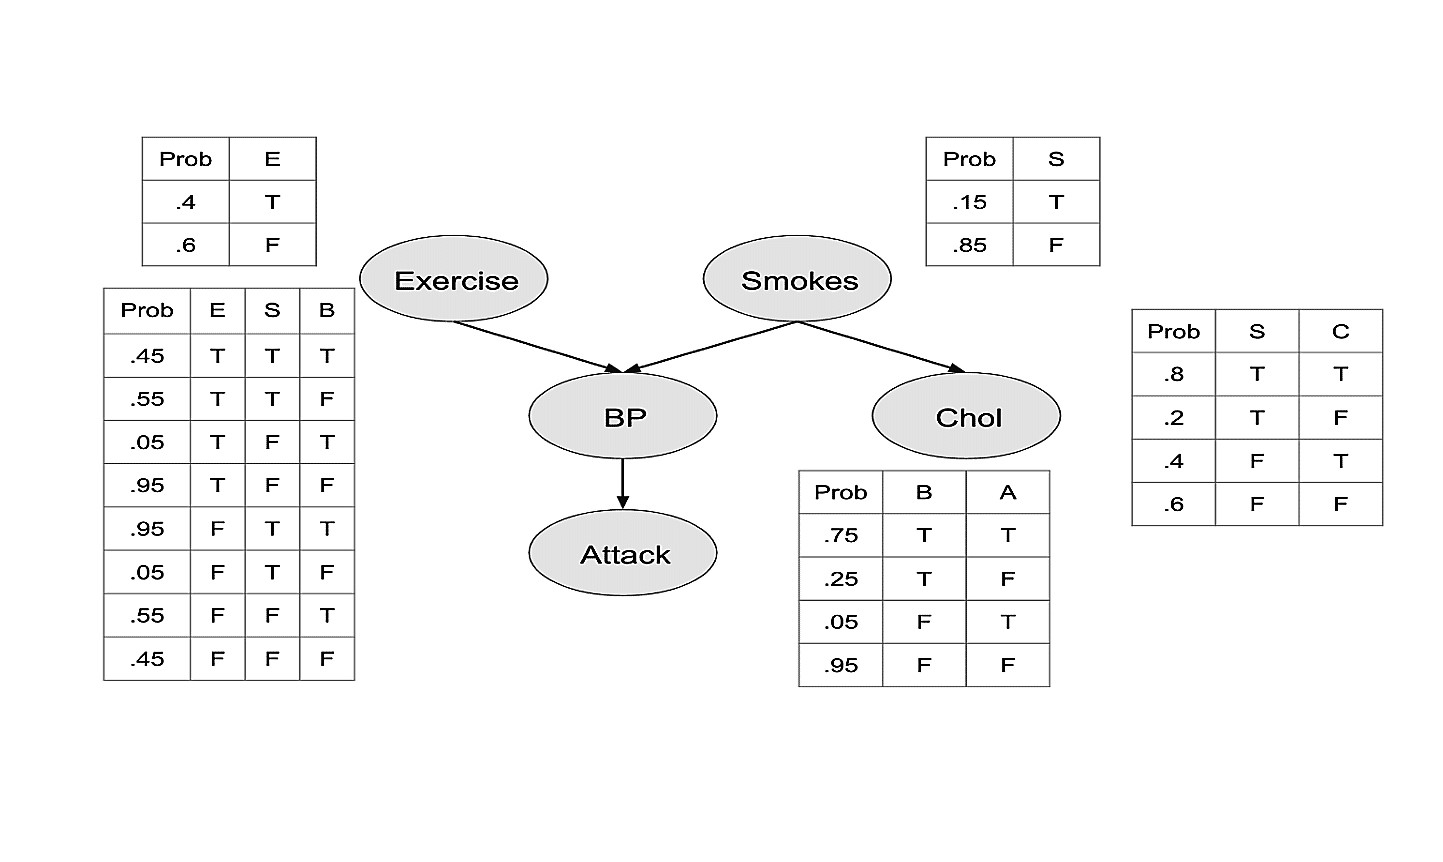

In [35]:
print(cpd_exe)
print(cpd_smoke)
Image('./image-2.png')

In [36]:
cpd_bp = TabularCPD(variable='BP', variable_card=2, values=[[0.45,0.05,0.95,0.55],
                                                           [0.55,0.95,0.05,0.45]], 
                    evidence=['Exercise','Smokes'],evidence_card=[2,2])
cpd_attack = TabularCPD(variable='Attack', variable_card=2, values=[[0.75,0.05],[0.25,0.95]], 
                        evidence=['BP'], evidence_card=[2])
cpd_chol = TabularCPD(variable='Chol', variable_card=2, values=[[0.8,0.4],[0.2,0.6]],
                      evidence=['Smokes'], evidence_card=[2])

In [37]:
print(cpd_bp)
print(cpd_attack)
print(cpd_chol)

╒══════════╤════════════╤════════════╤════════════╤════════════╕
│ Exercise │ Exercise_0 │ Exercise_0 │ Exercise_1 │ Exercise_1 │
├──────────┼────────────┼────────────┼────────────┼────────────┤
│ Smokes   │ Smokes_0   │ Smokes_1   │ Smokes_0   │ Smokes_1   │
├──────────┼────────────┼────────────┼────────────┼────────────┤
│ BP_0     │ 0.45       │ 0.05       │ 0.95       │ 0.55       │
├──────────┼────────────┼────────────┼────────────┼────────────┤
│ BP_1     │ 0.55       │ 0.95       │ 0.05       │ 0.45       │
╘══════════╧════════════╧════════════╧════════════╧════════════╛
╒══════════╤══════╤══════╕
│ BP       │ BP_0 │ BP_1 │
├──────────┼──────┼──────┤
│ Attack_0 │ 0.75 │ 0.05 │
├──────────┼──────┼──────┤
│ Attack_1 │ 0.25 │ 0.95 │
╘══════════╧══════╧══════╛
╒════════╤══════════╤══════════╕
│ Smokes │ Smokes_0 │ Smokes_1 │
├────────┼──────────┼──────────┤
│ Chol_0 │ 0.8      │ 0.4      │
├────────┼──────────┼──────────┤
│ Chol_1 │ 0.2      │ 0.6      │
╘════════╧══════════╧═══════

In [38]:
# Associating the CPDs with the network
model.add_cpds(cpd_exe, cpd_smoke, cpd_bp, cpd_attack, cpd_chol)

# check_model checks for the network structure and CPDs and verifies that the CPDs are correctly 
# defined and sum to 1.
model.check_model()

True

In [39]:
print(model.get_cpds('Exercise'))
print(model.get_cpds('Smokes'))
print(model.get_cpds('BP'))
print(model.get_cpds('Attack')) 
print(model.get_cpds('Chol'))

╒════════════╤═════╕
│ Exercise_0 │ 0.4 │
├────────────┼─────┤
│ Exercise_1 │ 0.6 │
╘════════════╧═════╛
╒══════════╤══════╕
│ Smokes_0 │ 0.15 │
├──────────┼──────┤
│ Smokes_1 │ 0.85 │
╘══════════╧══════╛
╒══════════╤════════════╤════════════╤════════════╤════════════╕
│ Exercise │ Exercise_0 │ Exercise_0 │ Exercise_1 │ Exercise_1 │
├──────────┼────────────┼────────────┼────────────┼────────────┤
│ Smokes   │ Smokes_0   │ Smokes_1   │ Smokes_0   │ Smokes_1   │
├──────────┼────────────┼────────────┼────────────┼────────────┤
│ BP_0     │ 0.45       │ 0.05       │ 0.95       │ 0.55       │
├──────────┼────────────┼────────────┼────────────┼────────────┤
│ BP_1     │ 0.55       │ 0.95       │ 0.05       │ 0.45       │
╘══════════╧════════════╧════════════╧════════════╧════════════╛
╒══════════╤══════╤══════╕
│ BP       │ BP_0 │ BP_1 │
├──────────┼──────┼──────┤
│ Attack_0 │ 0.75 │ 0.05 │
├──────────┼──────┼──────┤
│ Attack_1 │ 0.25 │ 0.95 │
╘══════════╧══════╧══════╛
╒════════╤══════════╤

In [40]:
model.is_active_trail('Chol','BP')

True

In [41]:
model.active_trail_nodes('Smokes')

{'Smokes': {'Attack', 'BP', 'Chol', 'Smokes'}}

In [42]:
model.local_independencies('Smokes')

(Smokes _|_ Exercise, Attack, Chol, BP)

In [43]:
model.get_independencies()

(Exercise _|_ Smokes, Chol)
(Exercise _|_ Chol | Smokes)
(Exercise _|_ Smokes | Chol)
(Exercise _|_ Attack | BP)
(Exercise _|_ Chol | Smokes, Attack)
(Exercise _|_ Attack, Chol | Smokes, BP)
(Exercise _|_ Attack | Chol, BP)
(Exercise _|_ Chol | Smokes, Attack, BP)
(Exercise _|_ Attack | Smokes, Chol, BP)
(BP _|_ Chol | Smokes)
(BP _|_ Chol | Exercise, Smokes)
(BP _|_ Chol | Smokes, Attack)
(BP _|_ Chol | Exercise, Attack, Smokes)
(Smokes _|_ Exercise)
(Smokes _|_ Exercise | Chol)
(Smokes _|_ Attack | BP)
(Smokes _|_ Attack | Exercise, BP)
(Smokes _|_ Attack | Chol, BP)
(Smokes _|_ Attack | Exercise, Chol, BP)
(Chol _|_ Exercise)
(Chol _|_ Exercise, Attack, BP | Smokes)
(Chol _|_ Attack | BP)
(Chol _|_ Attack, BP | Exercise, Smokes)
(Chol _|_ Attack | Exercise, BP)
(Chol _|_ Exercise, BP | Smokes, Attack)
(Chol _|_ Exercise, Attack | Smokes, BP)
(Chol _|_ BP | Exercise, Attack, Smokes)
(Chol _|_ Attack | Exercise, Smokes, BP)
(Chol _|_ Exercise | Smokes, Attack, BP)
(Attack _|_ Chol | S

In [47]:
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)

print(infer.query(['Attack']) ['Attack'])

╒══════════╤═══════════════╕
│ Attack   │   phi(Attack) │
╞══════════╪═══════════════╡
│ Attack_0 │        0.3370 │
├──────────┼───────────────┤
│ Attack_1 │        0.6630 │
╘══════════╧═══════════════╛


In [52]:
print(infer.query(['Attack'], evidence={'Smokes':1, 'Chol': 1, 'Exercise':1}) ['Attack'])

╒══════════╤═══════════════╕
│ Attack   │   phi(Attack) │
╞══════════╪═══════════════╡
│ Attack_0 │        0.7150 │
├──────────┼───────────────┤
│ Attack_1 │        0.2850 │
╘══════════╧═══════════════╛
